In [3]:
# 統計処理

from scipy.stats import norm
import matplotlib.pyplot as plt

(array([ 15.,  52., 146., 230., 260., 169.,  92.,  25.,   9.,   2.]),
 array([32.33908636, 38.22258814, 44.10608993, 49.98959171, 55.87309349,
        61.75659528, 67.64009706, 73.52359884, 79.40710063, 85.29060241,
        91.17410419]),
 <BarContainer object of 10 artists>)

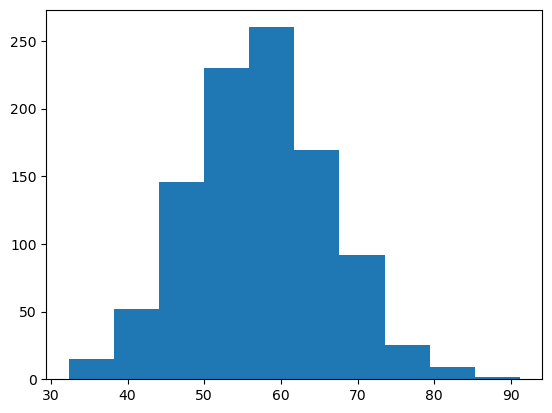

In [7]:
xs = norm.rvs(loc=57, scale=8.8, size=1000)
plt.hist(xs)


In [8]:
import numpy as np

# 体重データを非対称に生成
def generate_random_weight_data(n_samples):
    # 左側の体重を正規分布から生成
    weights_left = np.random.normal(loc=60, scale=10, size=n_samples // 2)
    # 右側の体重を正規分布から生成
    weights_right = np.random.normal(loc=80, scale=10, size=n_samples // 2)
    
    # 左右の体重を結合
    weights = np.concatenate((weights_left, weights_right))
    
    # 体重をシャッフル
    np.random.shuffle(weights)
    
    return weights

# サンプル数を設定
n_samples = 100

# 体重データを生成
weight_data = generate_random_weight_data(n_samples)

# 生成された体重データを表示
print(weight_data)


[100.27378361  94.56610544  69.32461545  59.19138135  76.25761068
  58.17186751  68.32046902  86.00727758  77.22154999  55.9692902
  41.64926475  54.04571569  86.15935055  57.1439526   74.69921285
  89.70968649  63.88712966  60.43879443  81.27473937  83.59377039
  70.50918127  81.19159015  70.8307699   59.97852335  39.97558998
  73.48276128  40.22554806  60.36964181  57.22809848  56.56016831
  59.34047345  56.5616447   66.06764818  83.88039076  86.14143206
  82.35563634  50.98274495  92.28334536  85.58749058  79.28710465
  91.90091597  85.02577766  87.20199516  68.94243342  79.62201827
  70.29682548  73.44030384  56.24828495  72.13725891  55.43742884
  87.82050907  63.19452367  49.70033056  66.06446778  76.22936225
  64.03380506  73.36120267  67.05039551  64.07818919  81.06249017
  69.47555227  73.97734105  66.11270434  67.34598422  59.11347881
  71.72901227  80.81692157  82.76503424  51.39747579  89.4142128
  91.81758974  56.01744388  76.22569177  67.41699143  78.23422599
  58.1633126

(array([ 4.,  3., 11., 17., 11., 17., 12., 13.,  8.,  4.]),
 array([ 39.97558998,  46.00540935,  52.03522871,  58.06504807,
         64.09486744,  70.1246868 ,  76.15450616,  82.18432553,
         88.21414489,  94.24396425, 100.27378361]),
 <BarContainer object of 10 artists>)

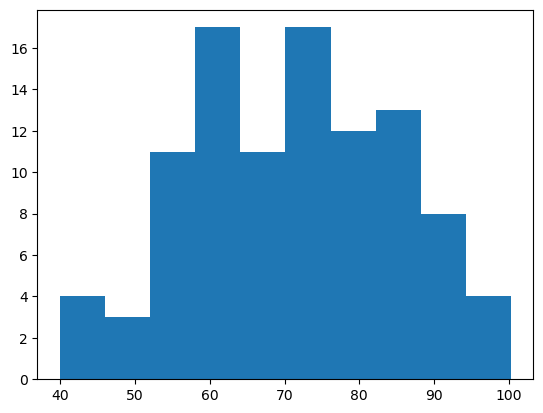

In [9]:
plt.hist(weight_data)